In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')
import os


In [2]:
paths = []
labels = []
for dirname, _, filenames in os.walk('C:\\Users\\amitk\\Desktop\\SEDetection\\TESS Toronto emotional speech set data'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
    if len(paths) == 5585:
        break
print('Dataset is Loaded')

Dataset is Loaded


In [3]:
paths[:10]

['C:\\Users\\amitk\\Desktop\\SEDetection\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_back_angry.wav',
 'C:\\Users\\amitk\\Desktop\\SEDetection\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_bar_angry.wav',
 'C:\\Users\\amitk\\Desktop\\SEDetection\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_base_angry.wav',
 'C:\\Users\\amitk\\Desktop\\SEDetection\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_bath_angry.wav',
 'C:\\Users\\amitk\\Desktop\\SEDetection\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_bean_angry.wav',
 'C:\\Users\\amitk\\Desktop\\SEDetection\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_beg_angry.wav',
 'C:\\Users\\amitk\\Desktop\\SEDetection\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_bite_angry.wav',
 'C:\\Users\\amitk\\Desktop\\SEDetection\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_boat_angry.wav',
 'C:\\Users\\amitk\\Desktop\\SEDetection\\TESS Toronto emotional speech set data\\OAF_angr

In [4]:
labels[:10]

['angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry']

In [5]:
## Create a dataframe
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

,speech,label
0,C:\Users\amitk\Desktop\SEDetection\TESS Toront...,angry
1,C:\Users\amitk\Desktop\SEDetection\TESS Toront...,angry
2,C:\Users\amitk\Desktop\SEDetection\TESS Toront...,angry
3,C:\Users\amitk\Desktop\SEDetection\TESS Toront...,angry
4,C:\Users\amitk\Desktop\SEDetection\TESS Toront...,angry


In [6]:
df['label'].value_counts()

label
angry      800
disgust    800
happy      800
neutral    800
ps         800
sad        800
fear       785
Name: count, dtype: int64

In [7]:
len(paths)

5585

# EDA


<Axes: xlabel='label', ylabel='count'>

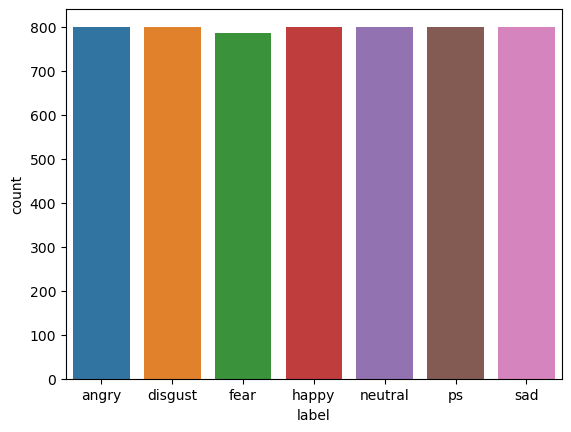

In [8]:
sns.countplot(data=df, x='label')

In [9]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()
    
def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

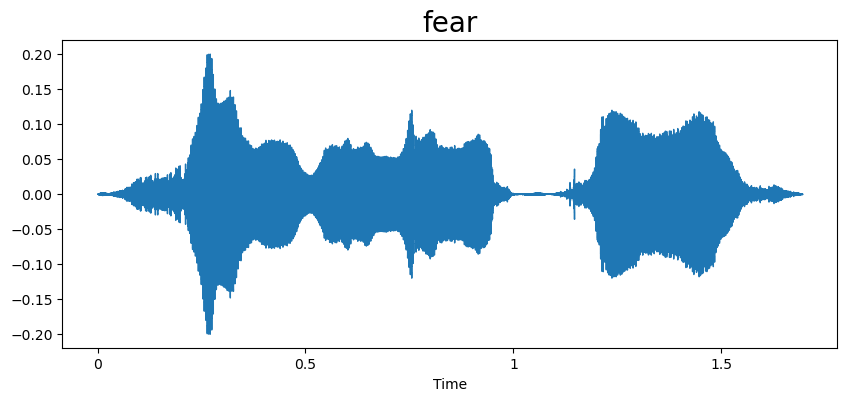

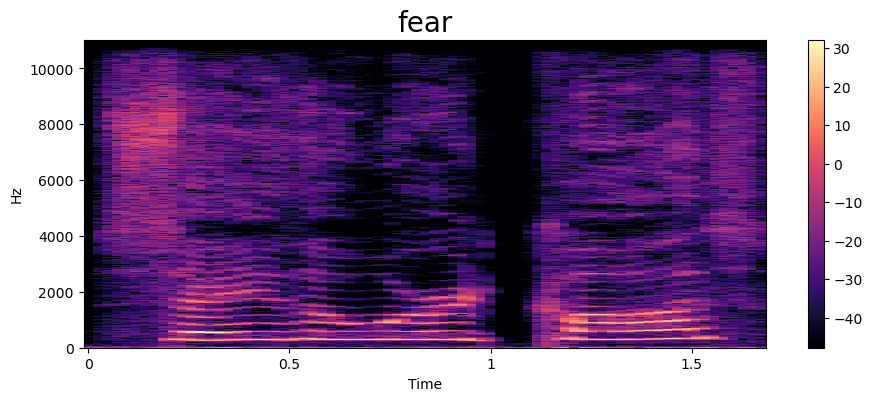

In [10]:
emotion = 'fear'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

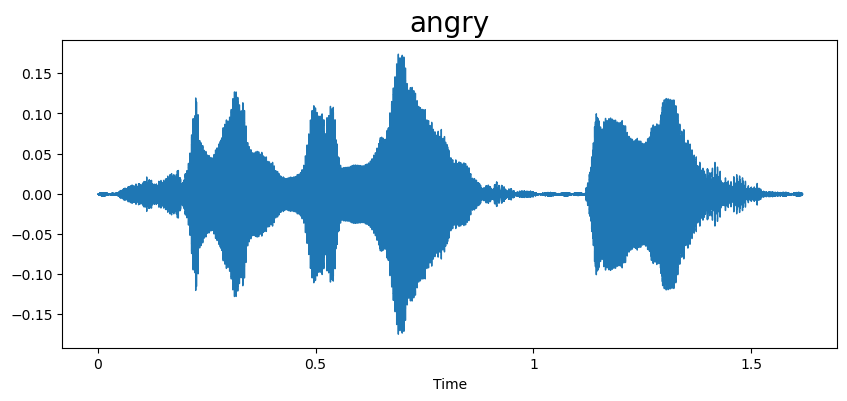

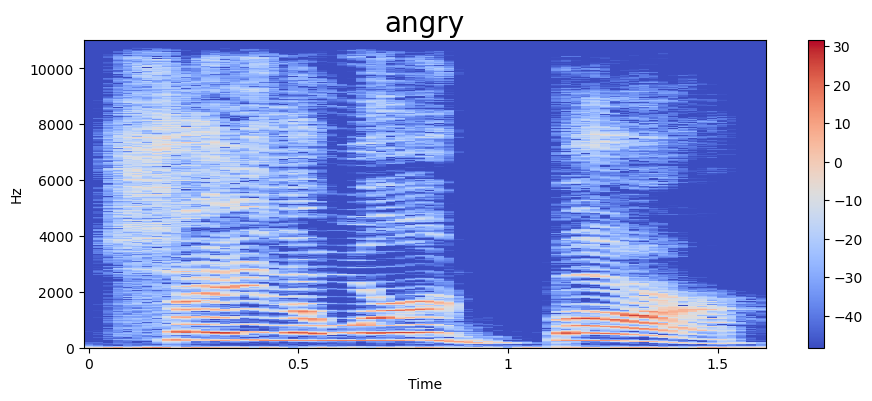

In [11]:
emotion = 'angry'
path = np.array(df['speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

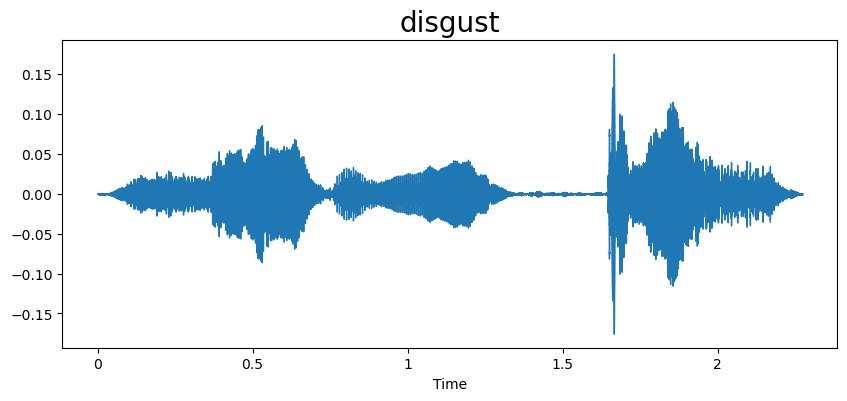

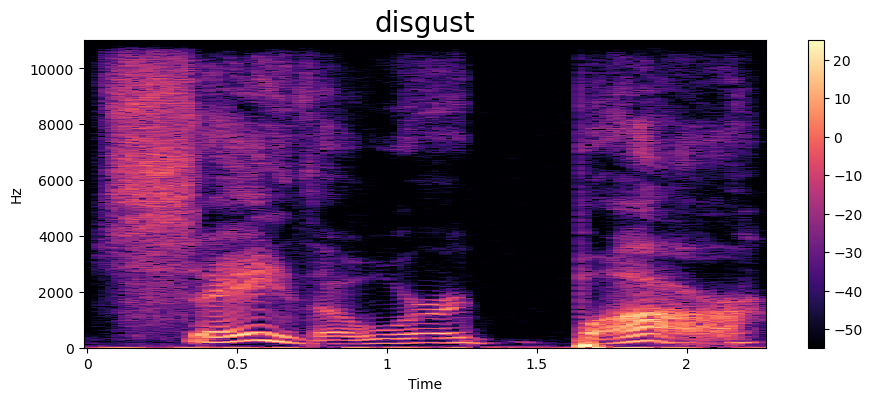

In [12]:
emotion = 'disgust'
path = np.array(df['speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

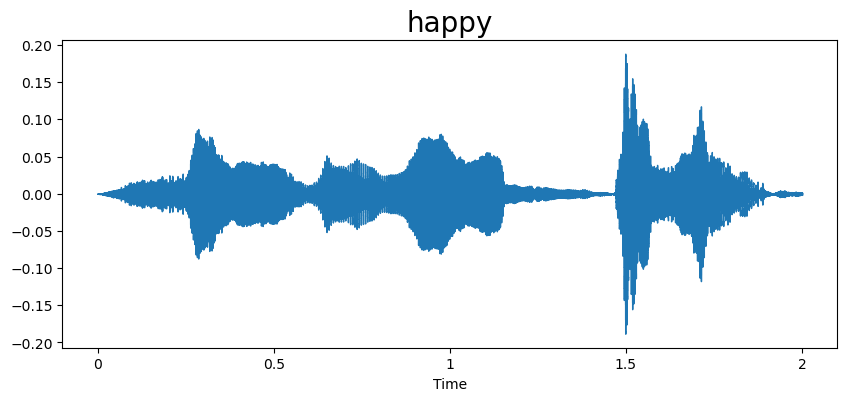

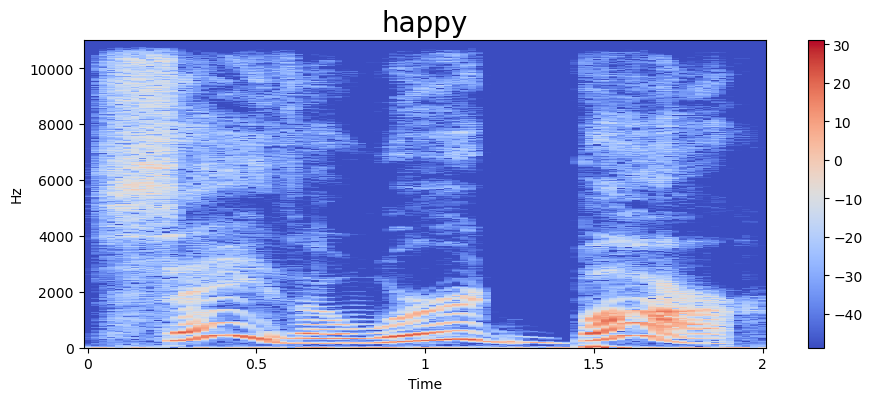

In [13]:
emotion = 'happy'
path = np.array(df['speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

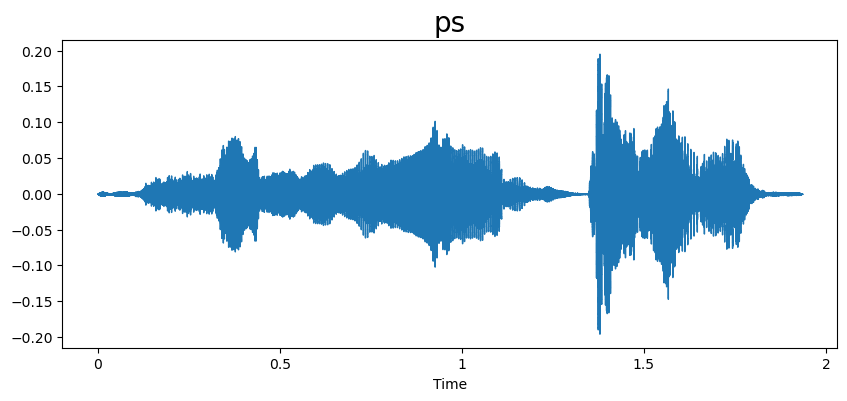

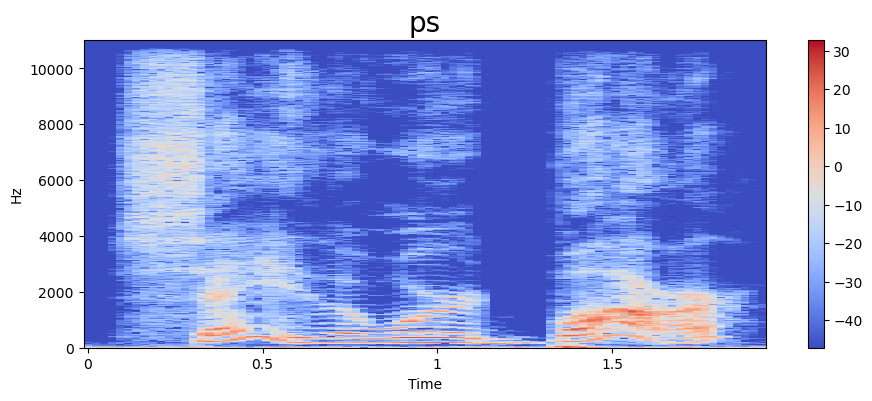

In [14]:
emotion = 'ps'
path = np.array(df['speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

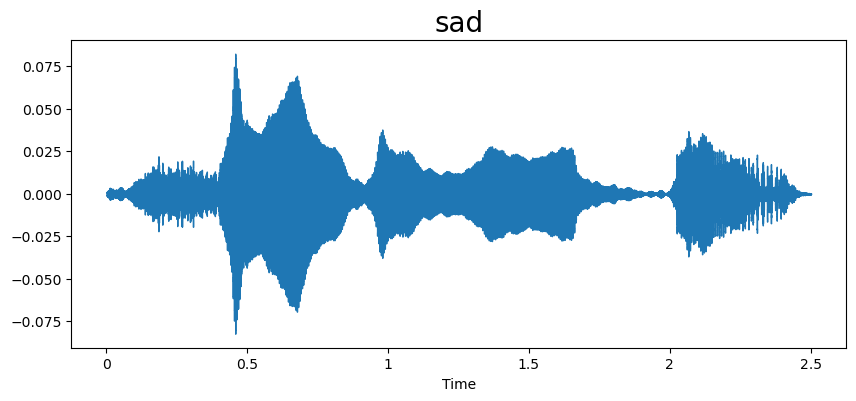

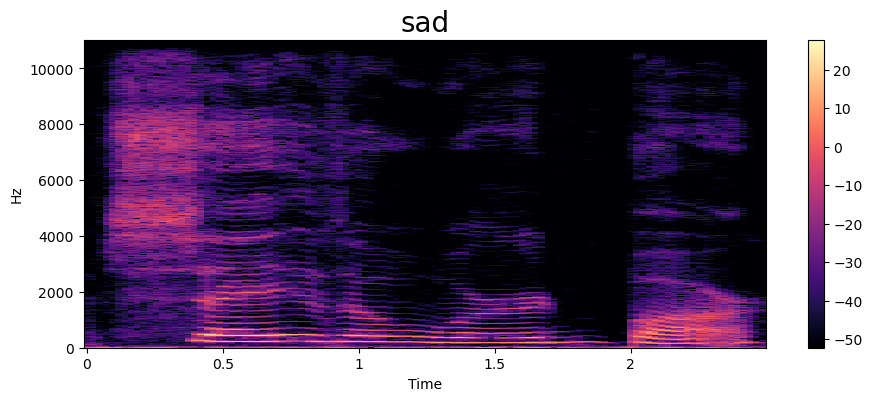

In [15]:
emotion = 'sad'
path = np.array(df['speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

# Feature Extraction

In [16]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [17]:
extract_mfcc(df['speech'][0])

array([-3.96986206e+02,  7.74405365e+01, -1.95927906e+01, -2.16666889e+01,
       -2.11275506e+00,  1.00753632e+01, -2.03667068e+01, -6.09244919e+00,
       -7.21228361e+00, -5.57365894e-01, -1.83255327e+00,  2.02101603e-01,
        7.27550924e-01,  1.31773770e+00,  2.88633800e+00,  2.85579133e+00,
       -4.71292162e+00, -4.43651056e+00, -1.62115908e+00, -1.02398405e+01,
       -7.55126143e+00, -1.79688025e+00, -7.03765202e+00,  9.43658447e+00,
        8.35585499e+00,  2.17123604e+01,  1.92169895e+01,  2.03489265e+01,
        1.34133663e+01,  8.33917141e+00,  3.94722581e-01,  5.11131477e+00,
        9.56873894e+00,  5.45486784e+00,  2.50996375e+00, -1.82390714e+00,
        4.86896276e+00,  9.31392384e+00,  2.08915019e+00, -1.90649128e+00],
      dtype=float32)

In [18]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))
X_mfcc

0       [-396.9862, 77.44054, -19.59279, -21.666689, -...
1       [-465.73267, 98.77373, 0.6560089, -32.74544, -...
2       [-429.79196, 46.124, 1.5550474, -0.21709539, 2...
3       [-403.46118, 76.32369, -12.531774, -22.288858,...
4       [-434.05756, 77.4455, 10.865501, 16.092943, 8....
                              ...                        
5580    [-406.48053, 80.379875, 32.462395, 46.579094, ...
5581    [-426.90918, 102.54757, 24.800041, 43.048096, ...
5582    [-378.50494, 80.91062, 35.300533, 39.74792, -4...
5583    [-434.8618, 89.906364, 28.37326, 39.57707, -2....
5584    [-421.8341, 70.69788, 32.476387, 45.642555, 4....
Name: speech, Length: 5585, dtype: object

In [19]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(5585, 40)

In [20]:
## input split
X = np.expand_dims(X, -1)
X.shape

(5585, 40, 1)

In [21]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

In [22]:
y = y.toarray()
y.shape

(5585, 7)

# Create LSTM Model

In [23]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(256, return_sequences=False, input_shape=(40,1)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 256)            │       264,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 305,799 (1.17 MB)

 Trainable params: 305,799 (1.17 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
history = model.fit(X, y, validation_split=0.2, epochs=50, batch_size=64)
# Save the trained model
model.save("emotion_detection_model.h5")


Epoch 1/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 6s 55ms/step - accuracy: 0.4874 - loss: 1.2857 - val_accuracy: 0.9534 - val_loss: 0.1829
Epoch 2/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - accuracy: 0.8871 - loss: 0.3375 - val_accuracy: 0.9167 - val_loss: 0.2786
Epoch 3/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - accuracy: 0.9180 - loss: 0.2976 - val_accuracy: 0.9329 - val_loss: 0.1926
Epoch 4/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - accuracy: 0.9569 - loss: 0.1337 - val_accuracy: 0.9660 - val_loss: 0.1025
Epoch 5/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - accuracy: 0.9567 - loss: 0.1342 - val_accuracy: 0.9857 - val_loss: 0.0525
Epoch 6/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - accuracy: 0.9721 - loss: 0.0971 - val_accuracy: 0.9928 - val_loss: 0.0302
Epoch 7/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - accuracy: 0.9793 - loss: 0.0701 - val_accuracy: 0.9937 - val_loss: 0.0225
Epoch 8/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - accuracy: 0.9804 - loss: 0.0554 - val_accuracy: 0.9875 - v

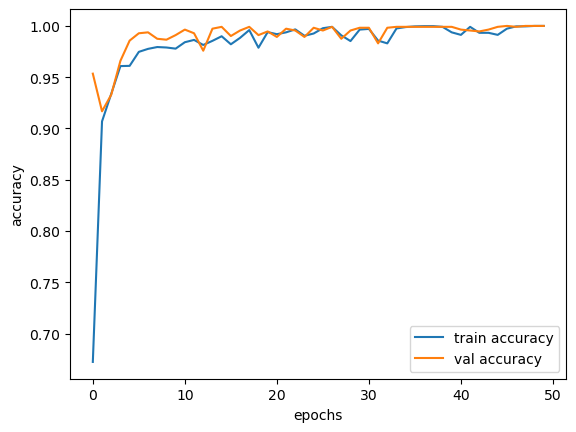

In [25]:

epochs = list(range(50))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

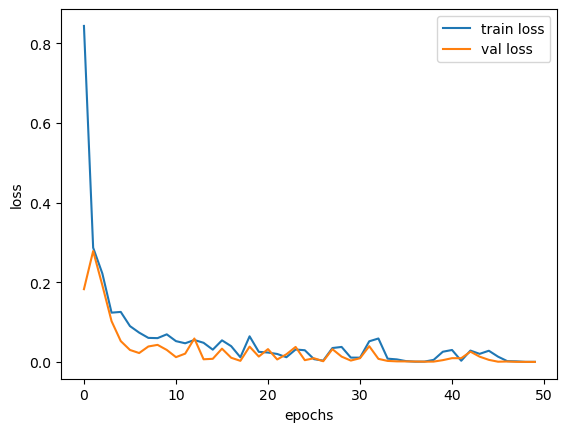

In [26]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()